## The purpose of this post is to explain how to scrape data from the Google Play Store and export it into a CSV file.
## Additionally, it will cover the basics of performing data visualization using the scraped data.

In [91]:
# Some important libraries
import google_play_scraper
from google_play_scraper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
def retrieve_apps(category):
    
    # Search for specific catogories in this code we are looking for Bussiness app using in Pakistan 
    result = search( category, lang="en", country="pk")
    
    # Create a list to store the data
    data = []
    for app in result:
        app_info = google_play_scraper.app(app["appId"])
        
        data.append({
            "Id":app["appId"],
              "title": app_info["title"],
              "summary": app_info["summary"],
              "number_of_installs": app_info["realInstalls"],
              "Average_rating": app_info["score"],
              "Ratings_recieved": app_info["ratings"],
              "Reviews_recieved": app_info["reviews"],
              "Ratings_histogram": app_info["histogram"],
              "price": app_info["price"],
              "developer_name": app_info["developer"],
              "genre": app_info["genre"]
        })
    
    df = pd.DataFrame(data)
    return df



In [129]:
# calling functions
df = retrieve_apps("Business")

In [130]:
# saving file to csv
df.to_csv("bussiness_app.csv")

In [92]:
df = pd.read_csv(r"C:\Users\MEER\Downloads\Bussiness_app.csv")

In [93]:
df.shape

(19, 12)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          19 non-null     int64  
 1   Id                  19 non-null     object 
 2   title               19 non-null     object 
 3   summary             19 non-null     object 
 4   number_of_installs  19 non-null     int64  
 5   Average_rating      19 non-null     float64
 6   Ratings_recieved    19 non-null     int64  
 7   Reviews_recieved    19 non-null     int64  
 8   Ratings_histogram   19 non-null     object 
 9   price               19 non-null     int64  
 10  developer_name      19 non-null     object 
 11  genre               19 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.9+ KB


# Installation of Bussiness App in Pakistan
Below bar chart shows that most of the people for his daily bussinesses using
- whatsapp messenger
- google meet
- whatsapp bussiness
- imo for international call
**In Pakistan, nowadays, most businessmen are using the WhatsApp Business app for marketing their products. Additionally, for business meetings, they are utilizing Google Meet.**

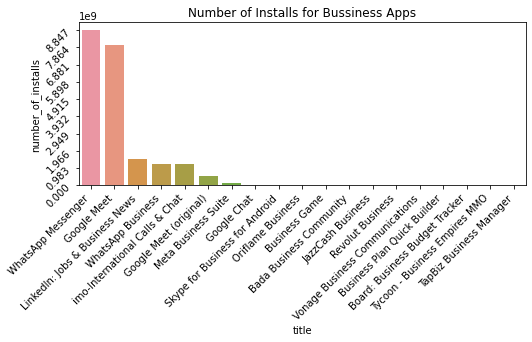

In [124]:
# Bar chart for Number of Installs
plt.figure(figsize=(8, 3))
df_sorted = df.sort_values('number_of_installs', ascending=False)
sns.barplot(x='title', y='number_of_installs',data =df_sorted)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.linspace(min(df_sorted['number_of_installs'] ),max(df_sorted['number_of_installs']),10), rotation=45)

plt.title('Number of Installs for Bussiness Apps')
plt.show()

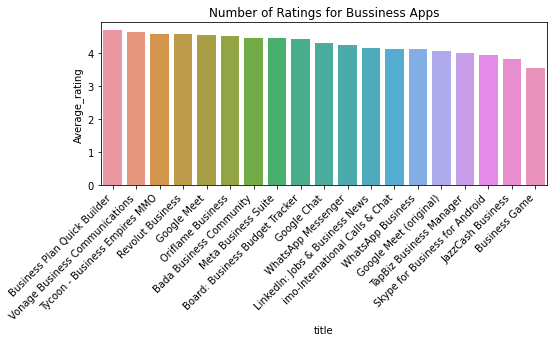

In [125]:
# Bar chart for Number of Installs
plt.figure(figsize=(8, 3))
df_sorted = df.sort_values('Average_rating', ascending=False)
sns.barplot(x='title', y='Average_rating',data =df_sorted)
plt.xticks(rotation=45, ha='right')

plt.title('Number of Ratings for Bussiness Apps')
plt.show()

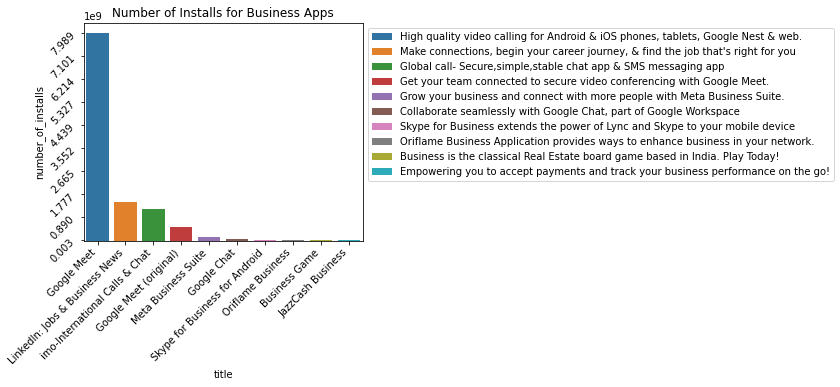

In [122]:
# Select the top 10 categories based on the number of installs
top_categories = df_sorted['title'].value_counts().nlargest(10).index
df_top_categories = df_sorted[df_sorted['title'].isin(top_categories)]

# Bar chart for Number of Installs (Top 10 categories)
plt.figure(figsize=(5, 4))  # Adjust the figure size as desired
sns.barplot(x='title', y='number_of_installs', hue='summary', data=df_top_categories, dodge=False)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.linspace(min(df_top_categories['number_of_installs']), max(df_top_categories['number_of_installs']), 10), rotation=45)

plt.title('Number of Installs for Business Apps')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Add a legend outside the plot area
plt.show()

**The average rating for all business apps in Pakistan is 3 or higher.**

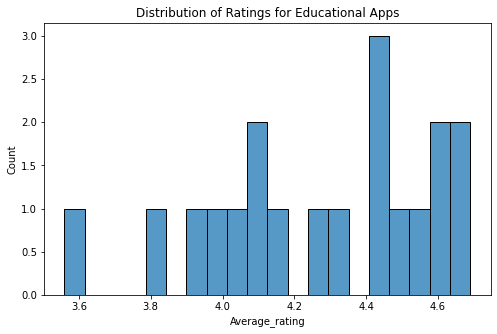

In [97]:
# Histogram for Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Average_rating'], bins=20)
plt.title('Distribution of Ratings for Educational Apps')
plt.show()

**All of the bussiness app are free in pakistan**

C:\Users\MEER\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


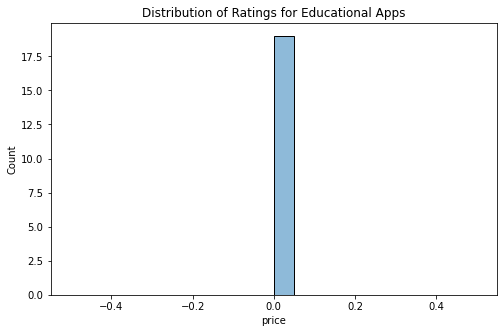

In [98]:
# Histogram for Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Ratings for Educational Apps')
plt.show()

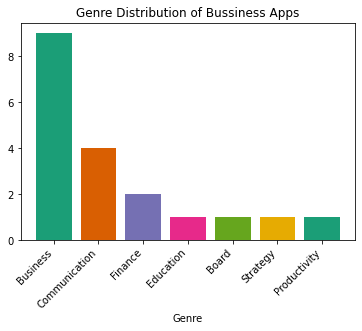

In [132]:
plt.figure(figsize=(6, 4))

genre_counts = df['genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values,color=sns.palettes.mpl_palette('Dark2'))
plt.title('Genre Distribution of Bussiness Apps')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

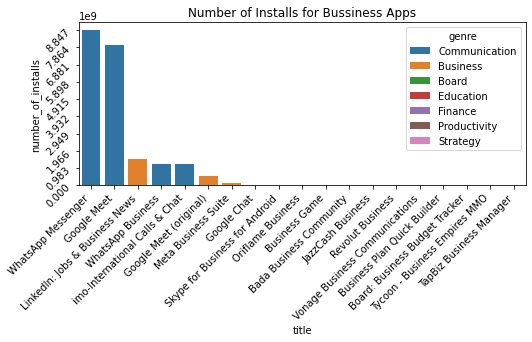

In [127]:
# Bar chart for Number of Installs
plt.figure(figsize=(8, 3))
df_sorted = df.sort_values('number_of_installs', ascending=False)
sns.barplot(x='title', y='number_of_installs',hue='genre',data =df_sorted,dodge=False)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.linspace(min(df_sorted['number_of_installs'] ),max(df_sorted['number_of_installs']),10), rotation=45)

plt.title('Number of Installs for Bussiness Apps')
plt.show()